# General

## Fix Random State

In [1]:
SEED = 55;

## Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as kr
import seaborn as sns
import os
#import scipy

# Importing the Raw Data

In [3]:
%%time


# Get Current Working directory and append the data relative dir
cwd = os.getcwd()
notTiredDir = cwd + r"\Data\Raw\NotTired"
tiredDir = cwd + r"\Data\Raw\Tired"

# Hold file locations
filesTired=[];
filesNotTired=[];

#Populate file location arrays
for file in os.listdir(notTiredDir):
    if file.endswith('.csv'):
        filesNotTired.append(os.path.join(notTiredDir, file))
for file in os.listdir(tiredDir):
        if file.endswith('.csv'):
            filesTired.append(os.path.join(tiredDir, file))
            
#Test reading files by changing num1
num1=6;
sample = pd.read_csv(filesNotTired[num1])
sample 

Wall time: 14.1 ms


,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2021-11-01 17:54:38.045,1.110457,-0.382196,0.082630,0.743808,0.455723,-0.523256,0.086015,0.487615,0.493558,...,4.134674,-5.824432,-1.510315,1.0,1.0,2.0,1.0,1.0,70.0,NaN
1,2021-11-01 17:54:39.045,0.904642,-0.382196,0.236881,0.613098,0.313527,-0.523256,0.171247,0.546970,0.538756,...,4.329071,-2.990723,-1.644897,1.0,1.0,2.0,1.0,1.0,70.0,NaN
2,2021-11-01 17:54:39.187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/jaw_clench
3,2021-11-01 17:54:40.045,0.652124,-0.382196,0.462323,0.410327,0.293693,-0.523256,0.267178,0.466408,0.343593,...,5.622559,-5.099182,-0.732727,1.0,1.0,2.0,1.0,1.0,70.0,NaN
4,2021-11-01 17:54:41.043,0.558608,-0.382196,0.502156,0.877835,0.281408,-0.523256,0.337400,0.469669,0.381862,...,4.882355,-3.536530,-1.652374,1.0,1.0,2.0,1.0,1.0,70.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2021-11-01 17:56:57.042,1.011459,-0.382196,0.502156,0.955036,0.456557,-0.523256,0.337400,0.439388,0.575279,...,5.510406,-7.880554,-2.257996,1.0,1.0,4.0,2.0,1.0,70.0,NaN
157,2021-11-01 17:56:57.111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
158,2021-11-01 17:56:57.852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
159,2021-11-01 17:56:58.042,1.011459,-0.382196,0.502156,0.955036,0.456557,-0.523256,0.337400,0.439388,0.575279,...,4.844971,-6.190796,-2.781372,1.0,1.0,4.0,4.0,1.0,70.0,NaN


In [4]:
#Mini-Summary of Block
print(f"> {len(filesNotTired)} files were added from the NOT TIRED category")
print(f"> {len(filesTired)} files were added from the TIRED category\n")

> 31 files were added from the NOT TIRED category
> 20 files were added from the TIRED category



## Available Features

In [81]:
pd.DataFrame(sample.columns).T

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements


## Raw Data Structure

In [6]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TimeStamp        161 non-null    object 
 1   Delta_TP9        141 non-null    float64
 2   Delta_AF7        141 non-null    float64
 3   Delta_AF8        141 non-null    float64
 4   Delta_TP10       141 non-null    float64
 5   Theta_TP9        141 non-null    float64
 6   Theta_AF7        141 non-null    float64
 7   Theta_AF8        141 non-null    float64
 8   Theta_TP10       141 non-null    float64
 9   Alpha_TP9        141 non-null    float64
 10  Alpha_AF7        141 non-null    float64
 11  Alpha_AF8        141 non-null    float64
 12  Alpha_TP10       141 non-null    float64
 13  Beta_TP9         141 non-null    float64
 14  Beta_AF7         141 non-null    float64
 15  Beta_AF8         141 non-null    float64
 16  Beta_TP10        141 non-null    float64
 17  Gamma_TP9       

# Data Preprocessing

## Creating the RAW Dataset

In [7]:
%%time
## Extract rows 21-25 from all files as these are the only 5 relevent features

rowsTired=[];
for f in filesTired:
    for r in range(pd.read_csv(f).shape[0]):
        rowsTired.append(pd.read_csv(f).iloc[r,[0, 21,22,23,24,25]])

rowsNotTired=[];
for f in filesNotTired:
    for r in range(pd.read_csv(f).shape[0]):
        rowsNotTired.append(pd.read_csv(f).iloc[r,[0, 21,22,23,24,25]])



Wall time: 12min 28s


In [8]:
data_NT = pd.DataFrame(rowsNotTired);
original_NT = data_NT.copy();
data_NT

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2021-11-01 17:27:27.362,792.967033,811.904762,769.194139,788.937729,680.549451
1,2021-11-01 17:27:28.362,751.465201,770.805861,780.879121,803.846154,799.816850
2,2021-11-01 17:27:29.362,747.435897,827.619048,793.369963,802.234432,906.190476
3,2021-11-01 17:27:30.371,838.901099,803.040293,803.443223,795.787546,817.142857
4,2021-11-01 17:27:31.366,809.890110,780.476190,798.205128,743.406593,785.311355
...,...,...,...,...,...,...
2888,2021-11-27 19:42:02.022,800.219780,804.652015,0.000000,778.864469,1116.923077
2889,2021-11-27 19:42:03.017,799.816850,803.040293,1246.666667,751.868132,1625.018315
2890,2021-11-27 19:42:04.017,759.120879,799.010989,116.446886,828.424908,796.593407
2891,2021-11-27 19:42:05.016,780.879121,815.934066,0.000000,788.937729,628.974359


In [9]:
data_T = pd.DataFrame(rowsTired);
original_T = data_T.copy();
data_T

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2021-11-11 00:54:16.918,782.893773,767.985348,1100.805861,799.413919,732.930403
1,2021-11-11 00:54:17.318,NaN,NaN,NaN,NaN,NaN
2,2021-11-11 00:54:17.920,790.549451,887.655678,1648.791209,809.487179,734.139194
3,2021-11-11 00:54:18.686,NaN,NaN,NaN,NaN,NaN
4,2021-11-11 00:54:18.929,755.494505,0.000000,0.000000,732.124542,565.714286
...,...,...,...,...,...,...
1295,2021-11-27 02:35:30.353,NaN,NaN,NaN,NaN,NaN
1296,2021-11-27 02:35:30.710,801.025641,812.307692,0.000000,802.637363,608.827839
1297,2021-11-27 02:35:30.977,NaN,NaN,NaN,NaN,NaN
1298,2021-11-27 02:35:31.711,808.681319,367.069597,46.336996,785.311355,652.344322


In [10]:
print(f"Not Tired Data size is: \t{data_NT.shape}", f"\nTired Data size is: \t\t{data_T.shape}")

Not Tired Data size is: 	(31213, 6) 
Tired Data size is: 		(26394, 6)


> **Conserved code, no longer required**
> ```python
> ## Adding empty column 
> Append an empty column in order to run the method.
> 
> #Conserve headers
> headers = original_NT.columns.values.tolist()
> 
> ##### #Stack ones or zeros for each class [0 = NotTired, 1 = Tired]
> ##### data_T = pd.DataFrame(np.hstack((data_T.to_numpy(),   np.zeros((data_T.shape[0], 1)) )))
> ##### data_NT= pd.DataFrame(np.hstack((data_NT.to_numpy(), np.zeros((data_NT.shape[0], 1)))))
> 
> #Reattach headers
> # data_T.columns =  np.hstack((headers, ['Empty']));
> # data_NT.columns = np.hstack((headers, ['Empty']));
> ```

In [82]:
#Conserve headers
headers = original_NT.columns.values.tolist()

data_T.columns =  np.hstack((headers));
data_NT.columns = np.hstack((headers));

#Check
data_NT


,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,1635812847.362,792.967033,811.904762,769.194139,788.937729,680.549451
1,1635812848.362,751.465201,770.805861,780.879121,803.846154,799.816850
2,1635812849.362,747.435897,827.619048,793.369963,802.234432,906.190476
3,1635812850.371,838.901099,803.040293,803.443223,795.787546,817.142857
4,1635812851.366,809.890110,780.476190,798.205128,743.406593,785.311355
...,...,...,...,...,...,...
2888,1638070922.022,800.219780,804.652015,0.000000,778.864469,1116.923077
2889,1638070923.017,799.816850,803.040293,1246.666667,751.868132,1625.018315
2890,1638070924.017,759.120879,799.010989,116.446886,828.424908,796.593407
2891,1638070925.016,780.879121,815.934066,0.000000,788.937729,628.974359


## Remove Empty Rows

In [13]:
data_T = data_T.dropna()

In [14]:
data_NT = data_NT.dropna()

## Convert Datetime Column to Timestamps
Required for compatibility with EEGFeatureGen from JayBird (see report/prez)

In [15]:
from datetime import datetime

ind = 0;
for time in data_T.iloc[:, 0]:
    tmstmp = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S.%f').timestamp()
    data_T.iat[ind, 0] = (tmstmp);
    ind=ind+1;
    
ind = 0;
for time in data_NT.iloc[:, 0]:
    tmstmp = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S.%f').timestamp()
    data_NT.iat[ind, 0] = (tmstmp);
    ind=ind+1;



In [16]:
data_NT.head()

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,1635812847.362,792.967033,811.904762,769.194139,788.937729,680.549451
1,1635812848.362,751.465201,770.805861,780.879121,803.846154,799.816850
2,1635812849.362,747.435897,827.619048,793.369963,802.234432,906.190476
3,1635812850.371,838.901099,803.040293,803.443223,795.787546,817.142857
4,1635812851.366,809.890110,780.476190,798.205128,743.406593,785.311355


## Save RAW Data to File

**Alternative STARTING POINT once data collection is finalized**

In [94]:
savelocT = cwd + r"\Data\Preprocessed\Tired.csv"
savelocNT = cwd + r"\Data\Preprocessed\NotTired.csv"

if os.path.exists(savelocT):
    os.remove(savelocT)
    
if os.path.exists(savelocNT):
    os.remove(savelocNT)

data_T.to_csv(savelocT,  mode='w', index = False)
data_NT.to_csv(savelocNT,mode='w', index = False)


## EEG Feature Generation

In [105]:
from eegFG import EEG_feature_extraction as FG

Nsamp = 250;
Perio = 3;

xT, yT = FG.generate_feature_vectors_from_samples(file_path=savelocT,
                                         nsamples=Nsamp, 
                                         period=Perio,
                                         #state=data_NT.iloc[:,-1],
                                         slide_percent=0.05,
                                         remove_redundant=False, 
                                         cols_to_ignore=None)
xT.shape

(259, 1790)

In [109]:
Nsamp = 250;
Perio = 5;

xNT, yNT = FG.generate_feature_vectors_from_samples(file_path=savelocNT,
                                         nsamples=Nsamp, 
                                         period=Perio,
                                         #state=data_NT.iloc[:,-1],
                                         slide_percent=0.06,
                                         remove_redundant=False, 
                                         cols_to_ignore=None)
xNT.shape

(219, 1790)

> **The following code was used to optimize feature generation in James Bird methods**

> ```python
> 
> %%time
> 
> from importlib import reload
> 
> flaggity=False
> 
> tmp_results=[]
> thresh = 95;
> for ns in range(50,256,1):
>     if (flaggity==True):
>         break;
>     for p in range(3,8):
>         
>         try:
>             reload(FG);
>             xT, yT = FG.generate_feature_vectors_from_samples(file_path=savelocT,
>                                  nsamples=ns, 
>                                  period=p,
>                                  #state=data_NT.iloc[:,-1],
>                                  slide_percent=0.01,
>                                  remove_redundant=False, 
>                                  cols_to_ignore=None)
>             
>             xNT, yNT = FG.generate_feature_vectors_from_samples(file_path=savelocNT,
>                                  nsamples=ns, 
>                                  period=p,
>                                  #state=data_NT.iloc[:,-1],
>                                  slide_percent=0.01,
>                                  remove_redundant=False, 
>                                  cols_to_ignore=None)
>         
>         except (UnboundLocalError):
>             continue;
>             
>         
>         if (xNT.shape[1] == xT.shape[1]):
>             print('Cols match!', xT.shape, xNT.shape)
>             if (xNT.shape[0] >= thresh and xT.shape[0] >= thresh):
>                 print('Thresh met.')
>                 tmp_results.append((ns,p,xNT.shape[0],xT.shape[0],xNT.shape[1]))
>                 flaggity=True;
>                 break;
>                 
>                 
> tmp_results
> 
> ```

In [20]:
X_NT = pd.DataFrame(xNT)
X_NT.columns = np.hstack((['TimeStamp'], yNT))
X_NT.describe()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,...,freq_156_4,freq_167_4,freq_177_4,freq_188_4,freq_198_4,freq_208_4,freq_219_4,freq_229_4,freq_240_4,freq_250_4
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02,2.190000e+02
mean,779.105307,790.250350,793.258774,774.799042,826.072764,0.795194,-0.121172,0.069205,-2.103254,-0.647116,...,1.883061e-16,1.745045e-16,1.544986e-16,1.448308e-16,1.547404e-16,1.846458e-16,1.476364e-16,1.515523e-16,1.510991e-16,1.629086e-16
std,13.221727,13.962959,10.783482,15.090785,48.215973,29.464956,27.057741,19.906972,39.864481,103.172259,...,1.326495e-16,1.444510e-16,1.269430e-16,1.087036e-16,1.012431e-16,1.309267e-16,1.119076e-16,1.210018e-16,1.094171e-16,1.336611e-16
min,742.197802,753.641026,778.260073,731.721612,730.996337,-88.384188,-79.917043,-84.016933,-130.084391,-210.246429,...,1.682008e-17,6.015924e-18,1.900429e-17,7.931615e-18,2.128355e-17,1.518165e-17,1.188983e-17,1.419177e-17,0.000000e+00,0.000000e+00
25%,773.142857,786.197802,785.391941,770.543956,795.304029,-20.452674,-10.171238,-8.063057,-17.210459,-56.006977,...,9.230115e-17,7.334713e-17,7.405775e-17,7.082150e-17,7.602051e-17,9.593048e-17,6.260944e-17,6.938637e-17,7.105427e-17,7.944109e-17
50%,780.717949,793.531136,791.194139,776.608059,825.362637,0.764957,3.152271,1.392108,0.776751,-7.501446,...,1.491212e-16,1.309328e-16,1.194447e-16,1.221453e-16,1.237816e-16,1.576475e-16,1.158174e-16,1.165273e-16,1.280949e-16,1.137423e-16
75%,790.065934,797.560440,797.399267,784.102564,849.296703,18.143992,11.409339,11.061487,15.138016,66.080933,...,2.449648e-16,2.106828e-16,1.944893e-16,1.750761e-16,2.196927e-16,2.355246e-16,2.025191e-16,1.702570e-16,2.139017e-16,1.913195e-16
max,797.479853,813.838828,826.329670,816.578755,970.981685,81.924841,93.667981,65.789165,145.152860,389.591801,...,6.238957e-16,6.452308e-16,7.038281e-16,6.440853e-16,4.659868e-16,9.722256e-16,4.971045e-16,6.153708e-16,5.329071e-16,6.787450e-16


In [21]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(pd.DataFrame(pd.DataFrame(X_NT).head()))

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_d_h2h1_4,lag1_mean_q1_0,lag1_mean_q1_1,lag1_mean_q1_2,lag1_mean_q1_3,lag1_mean_q1_4,lag1_mean_q2_0,lag1_mean_q2_1,lag1_mean_q2_2,lag1_mean_q2_3,lag1_mean_q2_4,lag1_mean_q3_0,lag1_mean_q3_1,lag1_mean_q3_2,lag1_mean_q3_3,lag1_mean_q3_4,lag1_mean_q4_0,lag1_mean_q4_1,lag1_mean_q4_2,lag1_mean_q4_3,lag1_mean_q4_4,lag1_mean_d_q1q2_0,lag1_mean_d_q1q2_1,lag1_mean_d_q1q2_2,lag1_mean_d_q1q2_3,lag1_mean_d_q1q2_4,lag1_mean_d_q1q3_0,lag1_mean_d_q1q3_1,lag1_mean_d_q1q3_2,lag1_mean_d_q1q3_3,lag1_mean_d_q1q3_4,lag1_mean_d_q1q4_0,lag1_mean_d_q1q4_1,lag1_mean_d_q1q4_2,lag1_mean_d_q1q4_3,lag1_mean_d_q1q4_4,lag1_mean_d_q2q3_0,lag1_mean_d_q2q3_1,lag1_mean_d_q2q3_2,lag1_mean_d_q2q3_3,lag1_mean_d_q2q3_4,lag1_mean_d_q2q4_0,lag1_mean_d_q2q4_1,lag1_mean_d_q2q4_2,lag1_mean_d_q2q4_3,lag1_mean_d_q2q4_4,lag1_mean_d_q3q4_0,lag1_mean_d_q3q4_1,lag1_mean_d_q3q4_2,lag1_mean_d_q3q4_3,lag1_mean_d_q3q4_4,lag1_std_0,lag1_std_1,lag1_std_2,lag1_std_3,lag1_std_4,lag1_std_d_h2h1_0,lag1_std_d_h2h1_1,lag1_std_d_h2h1_2,lag1_std_d_h2h1_3,lag1_std_d_h2h1_4,lag1_skew_0,lag1_skew_1,lag1_skew_2,lag1_skew_3,lag1_skew_4,lag1_kurt_0,lag1_kurt_1,lag1_kurt_2,lag1_kurt_3,lag1_kurt_4,lag1_max_0,lag1_max_1,lag1_max_2,lag1_max_3,lag1_max_4,lag1_max_d_h2h1_0,lag1_max_d_h2h1_1,lag1_max_d_h2h1_2,lag1_max_d_h2h1_3,lag1_max_d_h2h1_4,lag1_max_q1_0,lag1_max_q1_1,lag1_max_q1_2,lag1_max_q1_3,lag1_max_q1_4,lag1_max_q2_0,lag1_max_q2_1,lag1_max_q2_2,lag1_max_q2_3,lag1_max_q2_4,lag1_max_q3_0,lag1_max_q3_1,lag1_max_q3_2,lag1_max_q3_3,lag1_max_q3_4,lag1_max_q4_0,lag1_max_q4_1,lag1_max_q4_2,lag1_max_q4_3,lag1_max_q4_4,lag1_max_d_q1q2_0,lag1_max_d_q1q2_1,lag1_max_d_q1q2_2,lag1_max_d_q1q2_3,lag1_max_d_q1q2_4,lag1_max_d_q1q3_0,lag1_max_d_q1q3_1,lag1_max_d_q1q3_2,lag1_max_d_q1q3_3,lag1_max_d_q1q3_4,lag1_max_d_q1q4_0,lag1_max_d_q1q4_1,lag1_max_d_q1q4_2,lag1_max_d_q1q4_3,lag1_max_d_q1q4_4,lag1_max_d_q2q3_0,lag1_max_d_q2q3_1,lag1_max_d_q2q3_2,lag1_max_d_q2q3_3,lag1_max_d_q2q3_4,lag1_max_d_q2q4_0,lag1_max_d_q2q4_1,lag1_max_d_q2q4_2,lag1_max_d_q2q4_3,lag1_max_d_q2q4_4,lag1_max_d_q3q4_0,lag1_max_d_q3q4_1,lag1_max_d_q3q4_2,lag1_max_d_q3q4_3,lag1_max_d_q3q4_4,lag1_min_0,lag1_min_1,lag1_min_2,lag1_min_3,lag1_min_4,lag1_min_d_h2h1_0,lag1_min_d_h2h1_1,lag1_min_d_h2h1_2,lag1_min_d_h2h1_3,lag1_min_d_h2h1_4,lag1_min_q1_0,lag1_min_q1_1,lag1_min_q1_2,lag1_min_q1_3,lag1_min_q1_4,lag1_min_q2_0,lag1_min_q2_1,lag1_min_q2_2,lag1_min_q2_3,lag1_min_q2_4,lag1_min_q3_0,lag1_min_q3_1,lag1_min_q3_2,lag1_min_q3_3,lag1_min_q3_4,lag1_min_q4_0,lag1_min_q4_1,lag1_min_q4_2,lag1_min_q4_3,lag1_min_q4_4,lag1_min_d_q1q2_0,lag1_min_d_q1q2_1,lag1_min_d_q1q2_2,lag1_min_d_q1q2_3,lag1_min_d_q1q2_4,lag1_min_d_q1q3_0,lag1_min_d_q1q3_1,lag1_min_d_q1q3_2,lag1_min_d_q1q3_3,lag1_min_d_q1q3_4,lag1_min_d_q1q4_0,lag1_min_d_q1q4_1,lag1_min_d_q1q4_2,lag1_min_d_q1q4_3,lag1_min_d_q1q4_4,lag1_min_d_q2q3_0,lag1_min_d_q2q3_1,lag1_min_d_q2q3_2,lag1_min_d_q2q3_3,lag1_min_d_q2q3_4,lag1_min_d_q2q4_0,lag1_min_d_q2q4_1,lag1_min_d_q2q4_2,lag1_min_d_q2q4_3,lag1_min_d_q2q4_4,lag1_min_d_q3q4_0,lag1_min_d_q3q4_1,lag1_min_d_q3q4_2,lag1_min_d_q3q4_3,lag1_min_d_q3q4_4,lag1_covM_0_0,lag1_covM_0_1,lag1_covM_0_2,lag1_covM_0_3,lag1_covM_0_4,lag1_covM_1_1,lag1_covM_1_2,lag1_covM_1_3,lag1_covM_1_4,lag1_covM_2_2,lag1_covM_2_3,lag1_covM_2_4,lag1_covM_3_3,lag1_covM_3_4,lag1_covM_4_4,lag1_eigenval_0,lag1_eigenval_1,lag1_eigenval_2,lag1_eigenval_3,lag1_eigenval_4,lag1_logcovM_0_0,lag1_logcovM_0_1,lag1_logcovM_0_2,lag1_logcovM_0_3,lag1_logcovM_0_4,lag1_logcovM_1_1,lag1_logcovM_1_2,lag1_logcovM_1_3,lag1_logcovM_1_4,lag1_logcovM_2_2,lag1_logcovM_2_3,lag1_logcovM_2_4,lag1_logcovM_3_3,lag1_logcovM_3_4,lag1_logcovM_4_4,lag1_topFreq_1_0,lag1_topFreq_2_0,lag1_topFreq_3_0,lag1_topFreq_4_0,lag1_topFreq_5_0,lag1_topFreq_6_0,lag1_topFreq_7_0,lag1_topFreq_8_0,lag1_topFreq_9_0,lag1_topFreq_10_0,lag1_topFreq_1_1,lag1_topFreq_2_1,lag1_topFreq_3_1,la

In [22]:
X_T = pd.DataFrame(xT)
X_T.columns = np.hstack((['TimeStamp'], yT))
X_T.describe()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,...,freq_156_4,freq_167_4,freq_177_4,freq_188_4,freq_198_4,freq_208_4,freq_219_4,freq_229_4,freq_240_4,freq_250_4
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02
mean,853.022850,742.893619,911.472025,844.334452,784.668021,1.439227,-0.123772,-0.581400,4.849069,7.663767,...,4.706894e-17,3.404702e-17,3.489199e-17,3.983879e-17,4.338665e-17,4.854704e-17,4.007357e-17,4.649238e-17,4.644427e-17,4.273157e-17
std,118.126749,251.525994,217.512393,104.498981,33.160809,254.559496,381.727887,256.604333,246.614039,87.697119,...,3.940232e-17,2.291741e-17,2.453074e-17,3.198417e-17,2.243436e-17,2.956604e-17,2.879612e-17,4.108687e-17,3.984125e-17,2.391119e-17
min,732.796093,350.818071,532.069597,664.499389,705.665446,-628.239954,-655.880639,-731.972815,-460.710955,-218.204290,...,4.615758e-18,2.759144e-18,2.022967e-18,2.964421e-20,1.887122e-18,6.518450e-18,4.611536e-18,8.939066e-18,2.359224e-18,0.000000e+00
25%,765.869963,558.797314,777.084860,784.841270,770.570818,-34.380751,-320.332371,-73.953916,-43.008357,-37.787215,...,1.936982e-17,1.839066e-17,1.849984e-17,1.699074e-17,2.899532e-17,2.796610e-17,1.803535e-17,2.468225e-17,2.512148e-17,2.047150e-17
50%,805.189255,626.153846,882.954823,803.308913,794.645910,-0.355619,88.870928,7.618361,-12.709321,8.080558,...,3.816092e-17,2.602471e-17,2.690037e-17,2.963807e-17,3.860086e-17,3.544832e-17,3.376057e-17,3.576977e-17,4.189529e-17,4.213000e-17
75%,934.731380,967.301587,950.042735,876.507937,810.024420,30.105383,252.124660,124.322869,29.953412,45.431320,...,5.551883e-17,4.130061e-17,4.432209e-17,5.452344e-17,6.176773e-17,7.378400e-17,6.070668e-17,5.785969e-17,5.617334e-17,6.525182e-17
max,1152.985348,1349.884005,1541.947497,1150.097680,823.656899,717.580021,901.701208,607.799946,898.762093,231.658823,...,1.747216e-16,8.929123e-17,1.135637e-16,1.274392e-16,9.698879e-17,1.268587e-16,1.192844e-16,2.085431e-16,2.197232e-16,8.815618e-17


In [23]:
# Drop TimeStamp

X_T=X_T.iloc[:,1:];
X_NT=X_NT.iloc[:,1:];

## Attach Labels for Each Class

In [24]:
#Stack ones or zeros for each class [0 = NotTired, 1 = Tired]
X_T = pd.DataFrame(np.hstack((X_T.to_numpy(),   np.ones((X_T.shape[0], 1)) )))
X_NT= pd.DataFrame(np.hstack((X_NT.to_numpy(), np.zeros((X_NT.shape[0], 1)))))

In [25]:
X_T.columns  = np.hstack((yT, ['Target']))
X_NT.columns = np.hstack((yNT, ['Target']))

In [83]:
print(X_T.shape[0], X_NT.shape[0])


#Ensure Data is Coherent
if (X_T.shape[1] == X_NT.shape[1]):
    dataset = np.vstack((X_T, X_NT))
    dataset = pd.DataFrame(dataset)
    print('\n')
else:
    print('ATTENTION')


119 219




## Randomize the Dataset

In [85]:
dataset.columns = np.hstack((yT, ['Target']))
dataset = dataset.sample(frac = 1).reset_index(drop=True)
dataset.head()

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_d_h2h1_4,...,freq_167_4,freq_177_4,freq_188_4,freq_198_4,freq_208_4,freq_219_4,freq_229_4,freq_240_4,freq_250_4,Target
0,803.443223,791.113553,785.311355,780.073260,3.992237,-3.645572,19.216840,8.705780,-109.253000,794.918167,...,1.093240e-16,2.468714e-16,1.357424e-16,2.196927e-16,2.174998e-16,1.730740e-16,1.265343e-16,7.105427e-17,1.517720e-16,0.0
1,598.083028,857.234432,794.242979,812.106227,-51.096761,104.738592,-42.385550,-93.575194,11.378959,809.832821,...,2.196873e-17,1.283816e-17,6.016509e-17,7.675383e-17,7.633964e-17,7.281865e-17,2.462804e-17,1.165734e-17,7.119292e-17,1.0
2,790.630037,785.633700,790.307692,831.970696,0.384797,2.650787,7.739931,0.231068,-1.728920,781.144802,...,9.804573e-17,1.368279e-16,1.382476e-16,2.583560e-16,1.288990e-16,1.577732e-16,5.307402e-17,2.009718e-16,8.358438e-17,0.0
3,775.157509,819.238095,768.227106,765.406593,46.727498,36.067813,-49.891162,-12.012413,116.790125,816.987362,...,7.439812e-17,5.353170e-17,7.272715e-17,1.330643e-16,4.007911e-17,6.740294e-17,2.431975e-17,1.464821e-16,1.421085e-16,0.0
4,1097.515263,918.345543,847.967033,787.124542,-6.876628,371.657621,18.531251,-21.602340,26.299392,792.718603,...,2.351670e-17,7.944474e-17,2.964421e-20,7.480604e-17,9.621043e-17,3.700393e-17,2.473646e-17,5.178926e-17,6.936895e-17,1.0


## Separating Input and Output

In [28]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Y labeled for plotting or result check
def label(n):
    if (n==0):
        return 'Not Tired'
    return 'Tired'

y_labeled = list(map(label, y));

## Splitting Dataset into the Training and Test Sets

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = SEED)

## Feature Scaling


In [30]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler();
scX.fit(X_train); #Fit to training data only
x = scX.transform(x)

In [31]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,799,800,801,802,803,804,805,806,807,808
0,-2.020417,0.063912,-0.272688,-0.043985,0.007325,-2.162195,0.045925,-0.082211,-0.295119,-0.426027,...,-0.803872,-0.531201,-0.686827,-0.246249,-0.483358,-0.793894,-0.986663,-0.653624,-0.629536,-0.345243
1,-1.207459,-0.433804,-0.376505,-0.270933,0.097580,-0.756339,0.038635,0.345540,-0.636098,-0.087820,...,-0.661723,-0.670927,-0.535814,-1.023716,-0.958123,-0.946545,-0.145924,-0.759572,-0.157979,-0.241992
2,0.032620,-0.408416,-0.531756,0.345633,0.028255,0.076738,0.024393,0.108909,-0.391719,-0.064190,...,0.738385,-0.299748,0.210338,-0.559482,-0.037230,1.148064,-0.926812,0.558529,0.351306,-0.331986
3,0.135577,-0.350334,-0.131724,0.521553,0.049439,0.021173,0.018233,0.136783,-0.129276,-0.126947,...,1.696839,2.786308,-0.452228,2.534148,1.723208,1.383721,1.824881,2.506934,0.171456,1.006251
4,0.225283,-0.297183,-0.242590,2.060853,-0.051165,0.056711,0.066937,0.002469,1.734435,-0.154853,...,-0.408147,-0.570524,-0.344503,-0.648279,-0.410489,-0.233429,0.138195,0.333202,-0.386473,-0.178851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0.225283,-0.297183,-0.242590,2.060853,-0.051165,0.056711,0.066937,0.002469,1.734435,-0.154853,...,-0.408147,-0.570524,-0.344503,-0.648279,-0.410489,-0.233429,0.138195,0.333202,-0.386473,-0.178851
334,-1.056251,-0.501841,-0.410794,-0.118695,0.231892,0.230083,0.957425,0.053706,0.074113,-0.651035,...,-0.661723,-0.670927,-0.535814,-1.023716,-0.958123,-0.946545,-0.145924,-0.759572,-0.157979,-0.241992
335,0.208463,-0.308142,-0.254019,1.820655,-0.122802,-0.004418,0.073695,-0.115836,0.042123,0.050246,...,-0.677562,-0.546836,0.293071,-0.478913,-0.225651,-0.001791,-0.334934,0.385037,-0.590034,-0.610115
336,0.128442,-0.362937,-0.226589,0.091902,0.082501,0.034794,-0.013255,0.020982,0.365029,-0.242335,...,3.297208,1.718292,0.831918,1.391821,1.549814,2.037171,1.450844,1.591439,2.393529,0.510957


# Principal Component Analysis
## Calculate Principal Components

In [32]:
from sklearn.decomposition import PCA

information = 225; #15^2=225;
PrinCom=PCA(n_components=information, random_state = SEED)
PrinCom.fit(X_train)

Z_train = PrinCom.transform(X_train);
Z_test = PrinCom.transform(X_test);

print('Train set shape = ',Z_train.shape, '\nTest set shape  = ',Z_test.shape)


Z=PrinCom.transform(x)
pd.DataFrame(Z).describe() #Data No longer Standard
print(f"Using the first {Z.shape[1]} Principal Components describes {np.round(PrinCom.explained_variance_ratio_.sum() * 100,5)}% of the data.")
pd.DataFrame(Z)

Train set shape =  (270, 225) 
Test set shape  =  (68, 225)
Using the first 225 Principal Components describes 100.0% of the data.


,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,-184209.467958,-24078.247945,9912.300231,117.896152,-16873.735545,-24877.188422,3149.690835,-325.234013,-5031.932595,-4226.046974,...,68.166232,21.071902,-19.625520,55.926254,-43.931917,-42.475792,91.917693,-41.524764,-72.986205,133.216353
1,-184210.143341,-24078.590656,9912.602185,117.878967,-16874.430265,-24877.635001,3149.579791,-324.605756,-5032.131670,-4225.690745,...,68.434500,21.193897,-19.853365,55.671569,-44.388607,-43.354766,92.170892,-41.009492,-73.397997,133.131898
2,-184210.913260,-24079.218194,9912.521319,117.822865,-16874.921802,-24876.947975,3149.640957,-324.732359,-5032.205883,-4225.961274,...,68.000528,21.413704,-20.029643,55.056901,-44.250631,-41.986396,91.247563,-41.650320,-72.919797,134.155153
3,-184210.964356,-24079.178159,9912.511636,117.838106,-16874.845106,-24877.328783,3149.676188,-324.644669,-5032.356881,-4226.090038,...,68.277245,21.386708,-19.755131,55.205637,-44.945504,-42.088452,91.817971,-42.019413,-73.182905,133.747145
4,-184210.756740,-24079.232518,9912.440629,117.790128,-16875.263425,-24875.496689,3149.495307,-324.989348,-5031.453047,-4225.889788,...,67.868061,21.268689,-19.273612,54.779052,-45.103717,-41.955108,91.866930,-42.710407,-73.267481,134.348955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,-184210.756740,-24079.232518,9912.440629,117.790128,-16875.263425,-24875.496689,3149.495307,-324.989348,-5031.453047,-4225.889788,...,67.868061,21.268689,-19.273612,54.779052,-45.103717,-41.955108,91.866930,-42.710407,-73.267481,134.348955
334,-184210.096498,-24078.537588,9912.536128,117.922303,-16874.388485,-24877.612792,3149.545892,-324.561561,-5032.177114,-4225.687784,...,68.409682,21.422308,-19.726345,55.347394,-44.882147,-43.007403,91.967819,-40.839615,-73.776473,132.935468
335,-184210.723017,-24079.236605,9912.472645,117.782896,-16875.324303,-24875.136651,3149.484587,-325.147615,-5031.115120,-4226.018955,...,68.254813,21.769839,-19.492970,54.963628,-44.657724,-42.447660,92.372032,-42.580619,-73.214831,134.944616
336,-184210.958452,-24079.177569,9912.508171,117.835913,-16874.855711,-24877.273168,3149.666658,-324.671256,-5032.350755,-4226.055162,...,68.144774,21.610430,-19.586244,55.419814,-44.715152,-41.613061,91.304407,-42.278167,-72.796223,134.355716


## Scaling the Principal Components

In [33]:
## Ask Ahmad later [Al&Mus]
# scZ = StandardScaler();
# scZ.fit(Z_train);
# Z = scZ.transform(Z)
# Z_train = scZ.transform(Z_train)
# Z_test = scZ.transform(Z_test)
# pd.DataFrame(Z).head()

scZ = StandardScaler();
scZ.fit(Z);
Z = scZ.transform(Z)
pd.DataFrame(Z).head()

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,-0.019721,0.382118,-0.410705,-0.154780,1.332541,-0.116025,0.148006,-0.069969,-0.091196,-0.037736,...,0.582377,-0.726199,-0.320604,1.370241,1.425289,0.100377,0.529735,0.049809,0.432362,-0.715706
1,-0.205546,0.248142,-0.198356,-0.176759,0.487002,-0.338972,-0.048615,0.370641,-0.222577,0.228000,...,1.300456,-0.455325,-0.931195,0.935893,0.550706,-1.666062,1.022489,0.828103,-0.429356,-0.865234
2,-0.417381,0.002819,-0.255226,-0.248508,-0.111245,0.004015,0.059689,0.281852,-0.271554,0.026194,...,0.138834,0.032727,-1.403595,-0.112383,0.814937,1.083897,-0.774417,-0.139839,0.571327,0.946456
3,-0.431440,0.018470,-0.262035,-0.229016,-0.017899,-0.186098,0.122071,0.343350,-0.371206,-0.069859,...,0.879529,-0.027215,-0.667941,0.141277,-0.515778,0.878799,0.335664,-0.697337,0.020744,0.224071
4,-0.374316,-0.002780,-0.311970,-0.290376,-0.527032,0.728545,-0.198206,0.101620,0.225284,0.079520,...,-0.215744,-0.289259,0.622461,-0.586234,-0.818762,1.146775,0.430944,-1.741053,-0.156239,1.289587


# Image Creation

## Rescaling and Reshaping

In [34]:
## Scale all the PCA components on 0-256
# (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)


def gen_images(data):
    images=[];
    for r in range(0,data.shape[0]): #Cycle over rows
        pixels=[];
        mini=min(data[r,:])
        maxi=max(data[r,:])
        m = (maxi-mini)/(256);

        for c in range(0,225): #Cycle over cols
            #pixels.append(m * data[r,c] - mini);
            I = data[r,c]
            pixels.append((((I - mini) / (maxi - mini)) * 255.9).astype(np.uint8)) #Fixed Scaling, save as int

        #once cols are done running
        img = np.reshape(pixels, (15,15)); #reshape into a square image
        images.append(img)
        
    return images;
    
all_images  = gen_images(Z)
x_train_img = gen_images(Z_train)
x_test_img  = gen_images(Z_test)

#Get number of rows in train/test splits
height_total = Z.shape[0];
height_train = Z_train.shape[0];
height_test =  Z_test.shape[0];

#Reshape into input shape for CNN models
x_train_img = np.array(x_train_img).reshape(height_train,15,15,1)
x_test_img  = np.array(x_test_img).reshape(height_test,15,15,1)
all_images  = np.array(all_images).reshape(height_total,15,15,1)

## Saving Images

In [35]:
import imageio

# Relative paths to saved folders
TiredImgFolder = cwd + r"\Data\GeneratedImages\Tired"
NotTiredImgFolder = cwd + r"\Data\GeneratedImages\Not Tired"

# Clear the folders
import glob

files = glob.glob(TiredImgFolder + r"\*")
for f in files:
    os.remove(f)

files = glob.glob(NotTiredImgFolder + r"\*")
for f in files:
    os.remove(f)   


ctr1=0;
ctr2=0;
for img in all_images.reshape(height_total,15,15):
    
    if (y[ctr1+ctr2] == 0): #Not Tired
        fstr = NotTiredImgFolder + r"\img_" + str(ctr1) + r".png"
        imageio.imwrite(fstr, img[:, :], dpi=(300,300))
        ctr1+=1; #Counter
    else:
        fstr = TiredImgFolder + r"\img_" + str(ctr2) + r".png"
        imageio.imwrite(fstr, img[:, :], dpi=(300,300))
        ctr2+=1;

    
    

## Image Feature Generation

### Datagen Definitions

In [36]:
from keras.preprocessing.image import ImageDataGenerator

#rpath to IMageFolder
genimgsPath = cwd + r"\Data\GeneratedImages"

r  = 1
sr = 0.2
zr = 0.2
hf = False
ValidationSplit = 0.2

imageGenerator = ImageDataGenerator(rescale = r,
                                   shear_range = sr,
                                   zoom_range = zr,
                                   horizontal_flip = hf,
                                   validation_split=ValidationSplit)

### Generating Features

In [37]:
imgs_train = imageGenerator.flow_from_directory(genimgsPath,
                                                target_size = (15, 15),
                                                batch_size = 32,
                                                subset="training",
                                                class_mode='categorical',
                                                shuffle=True,
                                                color_mode="grayscale")

imgs_test = imageGenerator.flow_from_directory(genimgsPath,
                                               target_size = (15, 15),
                                               batch_size = 32,
                                               subset="validation",
                                               class_mode='categorical',
                                               shuffle=True,
                                               color_mode="grayscale")
print(imgs_test.class_indices)

Found 272 images belonging to 2 classes.
Found 66 images belonging to 2 classes.
{'Not Tired': 0, 'Tired': 1}


## Image Examples

This image is for the: "Tired" class.


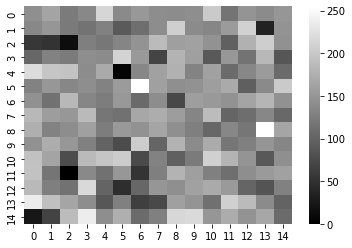

In [38]:
#first row of data
sns.heatmap(all_images.reshape(height_total,15,15)[0], cmap='gray');
print(f'This image is for the: \"{y_labeled[0]}\" class.')

This image is for the: "Tired" class.


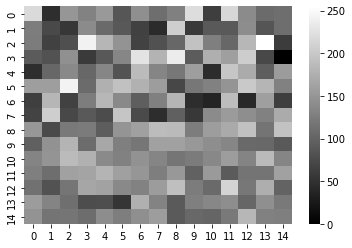

In [39]:
#nth row of data
n=252
sns.heatmap(all_images.reshape(height_total,15,15)[n], cmap='gray');
print(f'This image is for the: \"{y_labeled[n]}\" class.')

# Data Exploration

## General Correlation Matrix for Principal Components

<Figure size 1800x1200 with 0 Axes>

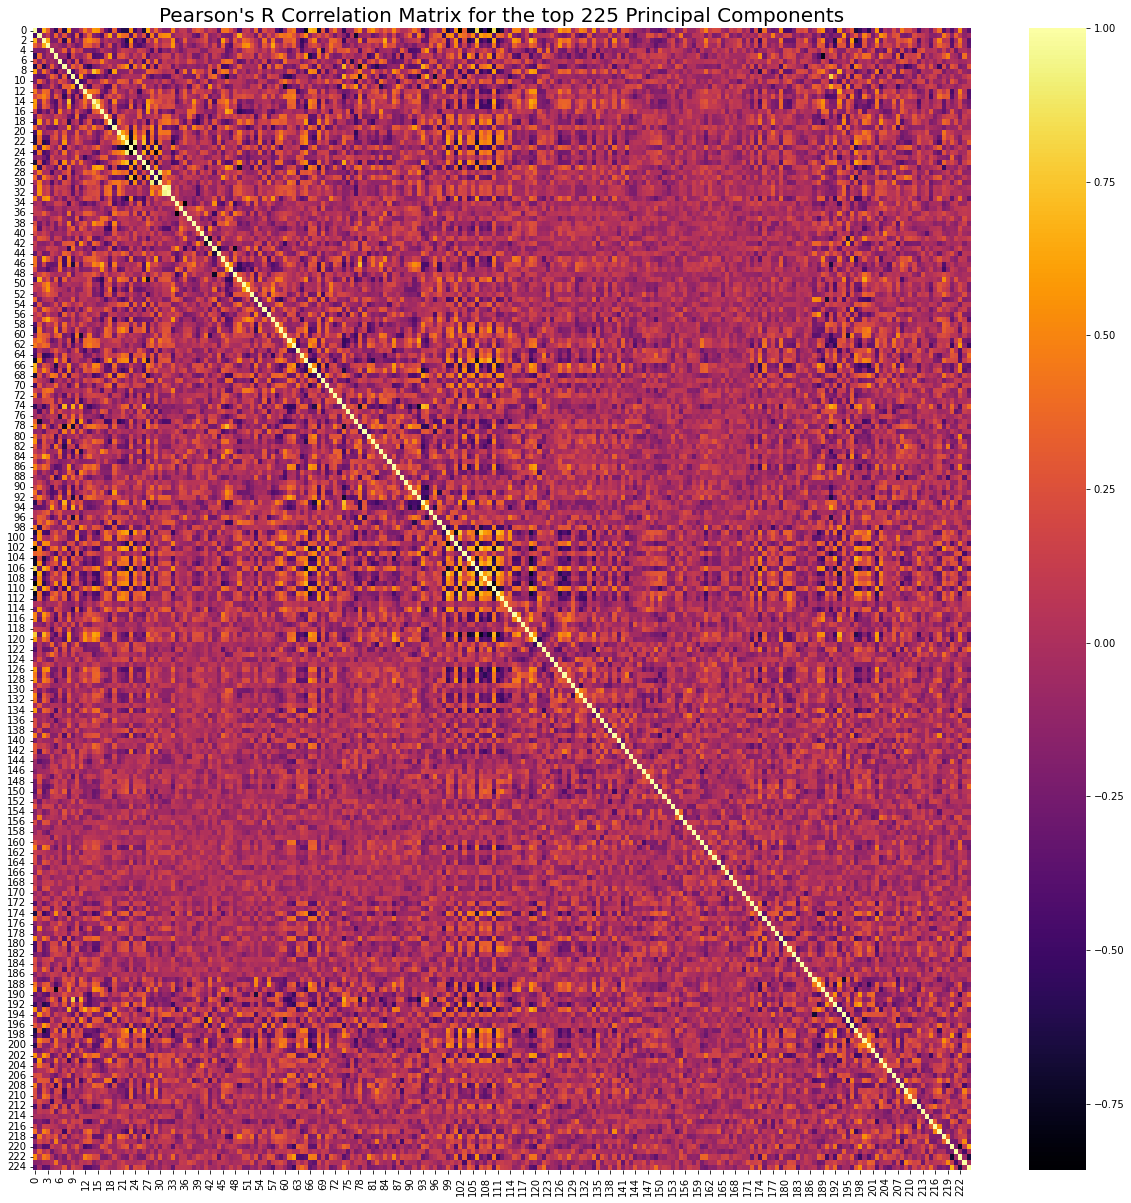

In [40]:
corr_mat = pd.DataFrame(Z).corr(method='pearson');
#mask = np.triu(np.ones_like(corr_mat, dtype=bool));
plt.figure(dpi=300);
plt.subplots(figsize=(21,21));
plt.title("Pearson's R Correlation Matrix for the top 225 Principal Components", fontsize=20);
sns.heatmap(corr_mat, annot=False, lw=0, linecolor='white', cmap='inferno');
#print('Too many features to visualize at once!')

<Figure size 1800x1200 with 0 Axes>

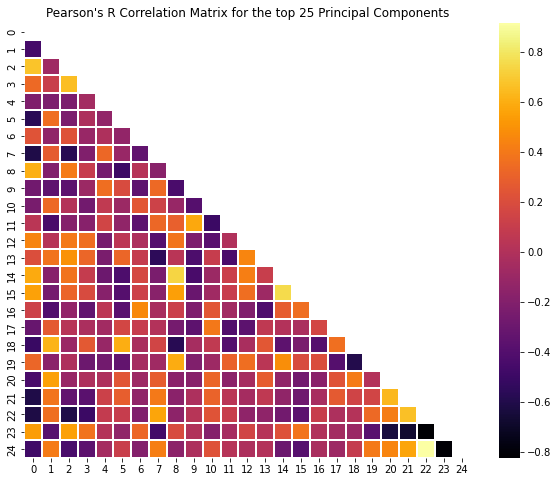

In [41]:
corr_mat = pd.DataFrame(Z[:,0:25]).corr(method='pearson');
mask = np.triu(np.ones_like(corr_mat, dtype=bool));
plt.figure(dpi=300);
plt.subplots(figsize=(10,8));
plt.title("Pearson's R Correlation Matrix for the top 25 Principal Components", fontsize=12);
sns.heatmap(corr_mat, annot=False, lw=0.2, linecolor='white', cmap='inferno', mask=mask);
#print('Too many features to visualize at once!')

## Plotting the Principal Components

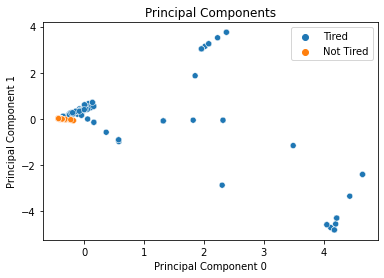

In [62]:
p1=0;
p2=1;
ax1 = sns.scatterplot(x=Z[:,p1], y=Z[:,p2], hue=y_labeled);
ax1.set(title='Principal Components',
        ylabel=f'Principal Component {p2}',
        xlabel=f'Principal Component {p1}');

## PC Distributions

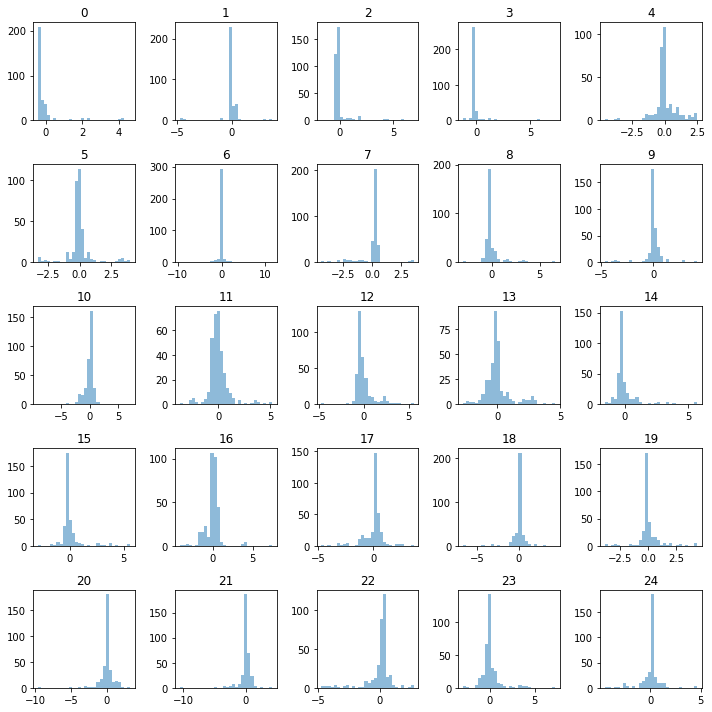

In [43]:
pc_title=[];
for i in range(1,25):
    pc_title.append(f'Principal Component {i}');

Z25 = Z[:,0:25]  

import warnings
warnings.filterwarnings('ignore')
with warnings.catch_warnings():      #Catch warnings in code section
    warnings.simplefilter("ignore")
    
    plt.subplots(figsize=(10,10));
    ax = plt.gca();
    pd.DataFrame(Z25).hist(bins=30, figsize=(1,1), grid=False, layout=(5,5), sharex=False, ax=ax, alpha=0.5);
    plt.tight_layout();

# ML Models

## Definitions

In [63]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold

#Callbacks
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

## Basic ANN Model

In [64]:
models = []; #to hold: (str: name, model: model, data_to_take: z/img)

In [65]:
def build_basicANN(optimizer='adam', epochs=100, batch_size=50, neurons=225):
    
    #Initializing ANN
    m= tf.keras.models.Sequential()
    
    #Add input layer
    m.add(tf.keras.layers.Dense(units=neurons, activation='relu'))
    
    #Add hidden layer
    m.add(tf.keras.layers.Dense(units=(neurons/2), activation='relu'))
    
    #Add output layer
    m.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    #Compiling ANN
    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #Return compiled, unfitted model
    return m;

In [66]:
%%time

#Build Model, Using defaults
## mANNBasic = build_basicANN() 
mANNBasic = (KerasClassifier(build_fn=build_basicANN, epochs=100, batch_size=50, optimizer='adam', verbose=0));

#Training ANN
hist_ANNBasic = mANNBasic.fit(Z_train, y_train, batch_size = 100, epochs = 100, verbose=0)

models.append(('ANN Basic', mANNBasic, 'z'))

Wall time: 894 ms


In [67]:
print(f'Accuracy of the unoptimized Basic ANN model = {round(accuracy_score(y_true=y_test, y_pred=mANNBasic.predict(x=Z_test)) * 100,3)}%')

Accuracy of the unoptimized Basic ANN model = 100.0%


## Basic CNN Model

In [68]:
# Random-ish architecture

def build_basicCNN(optimizer='adam', epochs=100, batch_size=50, neurons=225):
    
    m = tf.keras.models.Sequential()
    m.add(tf.keras.layers.Conv2D(filters=neurons, kernel_size=3, activation='relu', input_shape=[15, 15, 1]))
    m.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    m.add(tf.keras.layers.Conv2D(filters=neurons/2, kernel_size=3, activation='relu'))
    m.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    m.add(tf.keras.layers.Flatten())
    m.add(tf.keras.layers.Dense(units=neurons, activation='relu'))
    m.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

    return m;


In [69]:
%%time

#Build model using defaults
#mCNNBasic = build_basicCNN()
mCNNBasic = (KerasClassifier(build_fn=build_basicCNN, epochs=100, batch_size=50, optimizer='adam', verbose=0));

### ORIGINAL
hist_CNNBasic = mCNNBasic.fit(x=x_train_img,
                              y=y_train, 
                              batch_size = 50,
                              epochs = 100, 
                              verbose=0,
                              callbacks=es,
                              validation_data=(x_test_img, y_test))


models.append(('CNN Basic', mCNNBasic, 'img'))

Restoring model weights from the end of the best epoch.
Epoch 00039: early stopping
Wall time: 5.92 s


In [70]:
print(f'Accuracy of the unoptimized Basic CNN model = {round(accuracy_score(y_true=y_test, y_pred=mCNNBasic.predict(x=x_test_img)) * 100,3)}%')

Accuracy of the unoptimized Basic CNN model = 100.0%


In [71]:
%%time
#### DATAGEN -- DOES NOT USE KERASCLASSIFIER DUE TO ERROR
mCNNBasic2 = build_basicCNN()
hist_CNNBasic2 = mCNNBasic2.fit(
                               x=imgs_train,
                               #y=y_train, 
                               batch_size = 50,
                               epochs = 100, 
                               verbose=0,
                               callbacks=es,
                               validation_data=imgs_test
                               )

Restoring model weights from the end of the best epoch.
Epoch 00077: early stopping
Wall time: 21.1 s


## Advanced CNN Model

In [72]:
def build_advancedCNN(optimizer='adam', epochs=100, batch_size=50, neurons=225):
    #params
    initFilt = neurons;
    initUnits= neurons;
    
    #model
    m = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=initFilt, kernel_size=3, activation='relu', input_shape=[15,15,1]),
        tf.keras.layers.Conv2D(filters=initFilt/2, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=initUnits),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return m;

In [73]:
%%time

# build using defaults
#mCNNAdvanced = build_advancedCNN()
mCNNAdvanced = (KerasClassifier(build_fn=build_advancedCNN, epochs=100, batch_size=50, optimizer='adam', verbose=0));

#fit
hist_CNNAdvanced = mCNNAdvanced.fit(x_train_img,
                      y=y_train, 
                      batch_size = 50,
                      epochs = 100, 
                      verbose=0,
                      callbacks=es,
                      validation_data=(x_test_img, y_test))

models.append(('CNN Advanced', mCNNAdvanced, 'img'))

Wall time: 56.6 s


In [74]:
print(f'Accuracy of the unoptimized Advanced CNN model = {round(accuracy_score(y_true=y_test, y_pred=mCNNAdvanced.predict(x=x_test_img)) * 100,3)}%')

Accuracy of the unoptimized Advanced CNN model = 100.0%


In [75]:
%%time
#### DATAGEN -- DOES NOT USE KERASCLASSIFIER DUE TO ERROR
mCNNAdvanced2 = build_advancedCNN()
hist_CNNAdvanced2 = mCNNBasic2.fit(
                               x=imgs_train,
                               #y=y_train, 
                               batch_size = 50,
                               epochs = 100, 
                               verbose=0,
                               callbacks=es,
                               validation_data=imgs_test
                               )

Restoring model weights from the end of the best epoch.
Epoch 00039: early stopping
Wall time: 11.1 s


## Random Forest Model

In [76]:
%%time
from sklearn.ensemble import RandomForestClassifier
RFCmodel = RandomForestClassifier(n_estimators=100); #N_estimators and criterion can be optimized.
RFCmodel.fit(Z_train, y_train);
models.append(('RF', RFCmodel, 'z'));

Wall time: 201 ms


## Logistic Regression Model

In [77]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(solver='newton-cg');
LRmodel.fit(Z_train, y_train);
models.append(('LR',LRmodel, 'z'));

# Performance Comparison
## Via K-Fold Cross-Validation
### For SKLearn Models

In [78]:
%%time
#Suppress warnings for non-convergent ANN models
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Number of splits to make.
N = 3;


CV_results = [];
scoring = 'accuracy';

trun=0;
for tp in models:
    
    #Check whether model uses Z dataset or images for training
    mode = tp[2];
    
    if (mode == 'z'):
        kfold = StratifiedKFold(n_splits=N, shuffle=True)
        #kfold = model_selection.KFold(n_splits=N);
        CVinternal_results = model_selection.cross_val_score(tp[1], Z, y, cv=kfold, scoring=scoring);
        CV_results.append((CVinternal_results));
        
    if (mode == 'img'):
        kfold = StratifiedKFold(n_splits=N, shuffle=True)
        #kfold = model_selection.KFold(n_splits=N);
        CVinternal_results = model_selection.cross_val_score(tp[1], all_images, y, cv=kfold, scoring=scoring);
        CV_results.append((CVinternal_results));    
    
    print(f'run#{trun} for model \"{tp[0]}\" returned {CVinternal_results}')
    trun+=1;


run#0 for model "ANN Basic" returned [1. 1. 1.]
run#1 for model "CNN Basic" returned [1.         0.99115044 0.99107143]
run#2 for model "CNN Advanced" returned [0.99115044 1.         1.        ]
run#3 for model "RF" returned [1. 1. 1.]
run#4 for model "LR" returned [1. 1. 1.]
Wall time: 2min 48s


### For Keras Models
$\color{red}{NOTE:}$ The Following was not implemented due to model overfitting by all developed ML models. The results of K-Fold CV are essentially useless until more data is compiled.

In [79]:
names = [];
for tp in models:
    names.append(tp[0]);
    
CVdf = pd.DataFrame(CV_results).T;
CVdf.columns = names;
CVdf.T

,0,1,2
ANN Basic,1.00000,1.00000,1.000000
CNN Basic,1.00000,0.99115,0.991071
CNN Advanced,0.99115,1.00000,1.000000
RF,1.00000,1.00000,1.000000
LR,1.00000,1.00000,1.000000


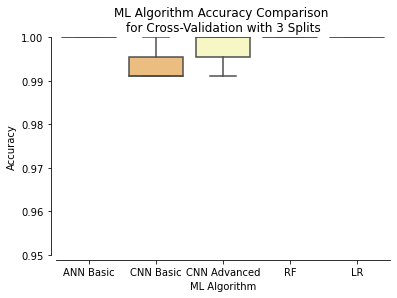

In [80]:
ax2 = sns.boxplot(data=CVdf, palette='Spectral')
ax2.set(xlabel = "ML Algorithm",
       ylabel = 'Accuracy',
       title = f"ML Algorithm Accuracy Comparison \nfor Cross-Validation with {N} Splits");
sns.despine(ax=ax2,offset=5, trim=False)
ax2.plot();
plt.ylim(0.95,1);